**Task**



1.   reading image using opencv
2.   detecting number plate in car using edge detection , Apply some filtering, edge detecting, use contors to find plate.
3.   extracting number plate text using EASY OCR,OCR stands for Optical Character Recognition.
easy ocr allows us to extract text in the images.








In [2]:
!pip install easyocr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!pip install imutils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
# import required libraries
import cv2
import matplotlib.pyplot as plt
import easyocr
import numpy as np
import imutils

READING IMAGES

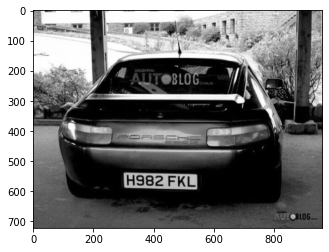

In [44]:
img = cv2.imread('image4.jpg') # read the image 
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # convert image into grey
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB)) # plot the grey scale image in matplotlib

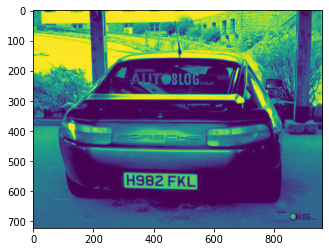

In [45]:
plt.imshow(gray) # plot without mentioning the grey color

Apply filter to reduce noice and find edges

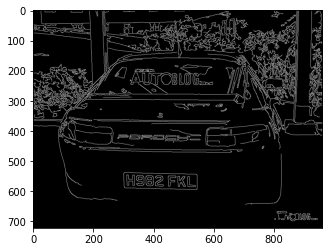

In [46]:
filter = cv2.bilateralFilter(gray, 11, 17, 17) # noise reduction using bilateralFiltering methods , 
# passing the gray scale image in filter, 11, 17, 17 inticates how intence we want
edge = cv2.Canny(filter, 30, 200) #Edge detection using canny
plt.imshow(cv2.cvtColor(edge, cv2.COLOR_BGR2RGB)) # plot using matplotlib

Find Contours and Apply Mask

1.   contours detecting where the white lines are , detecting edges of corners



In [58]:
keypoints = cv2.findContours(edge.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) # passing the edge image in contours
contours = imutils.grab_contours(keypoints) # imutils library for getting contours
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10] # return top 10 contors with decending order
contours

[array([[[311, 537]],
 
        [[310, 538]],
 
        [[302, 538]],
 
        [[300, 540]],
 
        [[300, 565]],
 
        [[301, 566]],
 
        [[301, 583]],
 
        [[302, 584]],
 
        [[302, 586]],
 
        [[303, 587]],
 
        [[303, 588]],
 
        [[305, 588]],
 
        [[306, 589]],
 
        [[340, 589]],
 
        [[341, 590]],
 
        [[386, 590]],
 
        [[387, 591]],
 
        [[419, 591]],
 
        [[420, 592]],
 
        [[470, 592]],
 
        [[471, 593]],
 
        [[508, 593]],
 
        [[509, 594]],
 
        [[541, 594]],
 
        [[543, 592]],
 
        [[543, 586]],
 
        [[544, 585]],
 
        [[544, 584]],
 
        [[543, 583]],
 
        [[543, 546]],
 
        [[541, 544]],
 
        [[539, 544]],
 
        [[538, 543]],
 
        [[505, 543]],
 
        [[504, 542]],
 
        [[457, 542]],
 
        [[456, 541]],
 
        [[454, 541]],
 
        [[453, 542]],
 
        [[452, 542]],
 
        [[451, 541]],
 
        [[401, 5

In [48]:
# loop through contours
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True) 
    if len(approx) == 4:
        location = approx
        break

In [49]:
location

array([[[300, 540]],

       [[306, 589]],

       [[543, 592]],

       [[538, 543]]], dtype=int32)

In [59]:
# plot the number plate from location contours
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,300, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

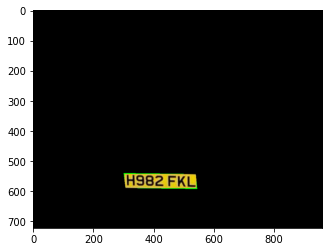

In [61]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))


In [65]:
# isolote the numper plate from above image
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

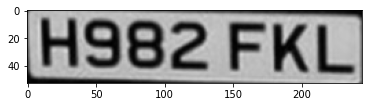

In [66]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

Use Easy OCR To Read Text

In [56]:
# easy ocr to read the text in the image
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:253: UserWarning: Accessing the model URLs via the internal dictionary of the module is deprecated since 0.13 and will be removed in 0.15. Please access them via the appropriate Weights Enum instead.
  "Accessing the model URLs via the internal dictionary of the module is deprecated since 0.13 and will "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


[([[0, 0], [244, 0], [244, 53], [0, 53]], 'H982 FKL', 0.9769778851628141)]

Render Result

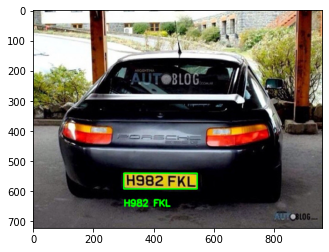

In [68]:
# render the results
text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=3, lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),4)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))